In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/GSE95233_metadata.csv')
df


,database,submission_date,release_date,last_update_date,title,accession,type,source,organism,gender,...,time point,survival,molecule,extract_protocol,label,label_protocol,hybridization_protocol,scan_protocol,description,data_processing
0,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-CS_500_D00,GSM2500349,RNA,Control 500,Homo sapiens,F,...,NaN,NaN,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
1,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-CS_526_D00,GSM2500350,RNA,Control 526,Homo sapiens,F,...,NaN,NaN,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
2,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-CS_529_D00,GSM2500351,RNA,Control 529,Homo sapiens,F,...,NaN,NaN,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
3,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-CS_530_D00,GSM2500352,RNA,Control 530,Homo sapiens,F,...,NaN,NaN,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
4,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-CS_535_D00,GSM2500353,RNA,Control 535,Homo sapiens,F,...,NaN,NaN,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-NS_077_D02,GSM2500468,RNA,"Patient 77, Day2",Homo sapiens,F,...,D02,Non Survivor,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
120,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-NS_078_D01,GSM2500469,RNA,"Patient 78, Day1",Homo sapiens,F,...,D01,Non Survivor,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
121,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-NS_078_D03,GSM2500470,RNA,"Patient 78, Day3",Homo sapiens,F,...,D03,Non Survivor,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the GeneArray Sca...,Gene expression data from whole blood,The data were normalized using RMA methods.
122,GEO,2017-02-22,2017-11-27,2017-11-28,Blood-NS_081_D01,GSM2500471,RNA,"Patient 81, Day1",Homo sapiens,F,...,D01,Non Survivor,total RNA,Total RNA was extracted from PAXgene tubes acc...,biotin,Biotinylated cRNA were prepared according to t...,"Following fragmentation, cRNA were hybridized ...",GeneChips were scanned using the Gene

In [4]:
for col in df.columns:
    print(col)

database
submission_date
release_date
last_update_date
title
accession
type
source
organism
gender
age
time point
survival
molecule
extract_protocol
label
label_protocol
hybridization_protocol
scan_protocol
description
data_processing


# **Data Cleaning**

In [5]:
df1= df.drop(columns=['database', 'submission_date',	'release_date', 'last_update_date', 'extract_protocol','label', 'label_protocol',	'hybridization_protocol',	'scan_protocol', 'description', 'data_processing'])
df1=df1.dropna(how='all')

df1
              


,title,accession,type,source,organism,gender,age,time point,survival,molecule
0,Blood-CS_500_D00,GSM2500349,RNA,Control 500,Homo sapiens,F,52,NaN,NaN,total RNA
1,Blood-CS_526_D00,GSM2500350,RNA,Control 526,Homo sapiens,F,53,NaN,NaN,total RNA
2,Blood-CS_529_D00,GSM2500351,RNA,Control 529,Homo sapiens,F,52,NaN,NaN,total RNA
3,Blood-CS_530_D00,GSM2500352,RNA,Control 530,Homo sapiens,F,53,NaN,NaN,total RNA
4,Blood-CS_535_D00,GSM2500353,RNA,Control 535,Homo sapiens,F,76,NaN,NaN,total RNA
...,...,...,...,...,...,...,...,...,...,...
119,Blood-NS_077_D02,GSM2500468,RNA,"Patient 77, Day2",Homo sapiens,F,78,D02,Non Survivor,total RNA
120,Blood-NS_078_D01,GSM2500469,RNA,"Patient 78, Day1",Homo sapiens,F,53,D01,Non Survivor,total RNA
121,Blood-NS_078_D03,GSM2500470,RNA,"Patient 78, Day3",Homo sapiens,F,53,D03,Non Survivor,total RNA
122,Blood-NS_081_D01,GSM2500471,RNA,"Patient 81, Day1",Homo sapiens,F,54,D01,Non Survivor,total RNA


In [21]:
df1.loc [(df1['gender'] == 'F') , 'Gender']= 'Female'
df1.loc [(df1['gender'] == 'M') , 'Gender']= 'Male'
df1.loc [(df1['age'] >= 18) & (df1['age'] <= 35) , 'Age']= 'Young'
df1.loc [(df1['age'] >= 36) & (df1['age'] <= 64) , 'Age']= 'Middle'
df1.loc [(df1['age'] >= 65) , 'Age']= 'Elderly'
df1

,title,accession,type,source,organism,gender,age,time point,survival,molecule,Gender,Age
0,Blood-CS_500_D00,GSM2500349,RNA,Control 500,Homo sapiens,F,52,NaN,NaN,total RNA,Female,Middle
1,Blood-CS_526_D00,GSM2500350,RNA,Control 526,Homo sapiens,F,53,NaN,NaN,total RNA,Female,Middle
2,Blood-CS_529_D00,GSM2500351,RNA,Control 529,Homo sapiens,F,52,NaN,NaN,total RNA,Female,Middle
3,Blood-CS_530_D00,GSM2500352,RNA,Control 530,Homo sapiens,F,53,NaN,NaN,total RNA,Female,Middle
4,Blood-CS_535_D00,GSM2500353,RNA,Control 535,Homo sapiens,F,76,NaN,NaN,total RNA,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
119,Blood-NS_077_D02,GSM2500468,RNA,"Patient 77, Day2",Homo sapiens,F,78,D02,Non Survivor,total RNA,Female,Elderly
120,Blood-NS_078_D01,GSM2500469,RNA,"Patient 78, Day1",Homo sapiens,F,53,D01,Non Survivor,total RNA,Female,Middle
121,Blood-NS_078_D03,GSM2500470,RNA,"Patient 78, Day3",Homo sapiens,F,53,D03,Non Survivor,total RNA,Female,Middle
122,Blood-NS_081_D01,GSM2500471,RNA,"Patient 81, Day1",Homo sapiens,F,54,D01,Non Survivor,total RNA,Female,Middle


# **Data Visualization**




In [9]:
df2 = df1.groupby(['Gender', 'survival']).size().reset_index()
df2= df2.rename(columns={0:'Survival Count'})
df2

,Gender,survival,Survival Count
0,Female,Non Survivor,18
1,Female,Survivor,18
2,Male,Non Survivor,12
3,Male,Survivor,50


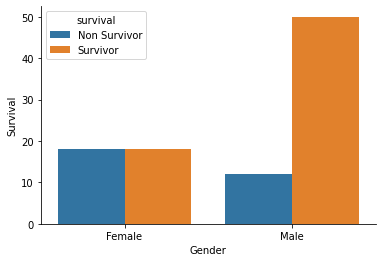

In [13]:
axes1=sns.barplot(data=df2,x='Gender',y='Survival Count', hue='survival')
axes1.set(xlabel='Gender', ylabel='Survival')
sns.despine()

In [23]:
df3 = df1.groupby(['survival', 'Gender', 'Age']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3

,survival,Gender,Age,Gender Count
0,Non Survivor,Female,Elderly,6
1,Non Survivor,Female,Middle,12
2,Non Survivor,Male,Elderly,6
3,Non Survivor,Male,Middle,6
4,Survivor,Female,Elderly,10
5,Survivor,Female,Middle,4
6,Survivor,Female,Young,4
7,Survivor,Male,Elderly,32
8,Survivor,Male,Middle,16
9,Survivor,Male,Young,2


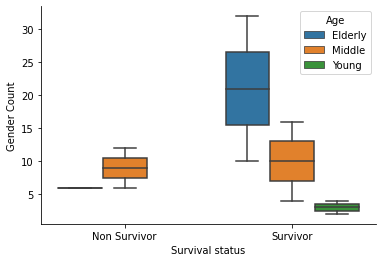

In [31]:
axes2=sns.boxplot(data=df3,x='survival',y='Gender Count', hue='Age')
axes2.set(xlabel='Survival status', ylabel='Gender Count')
sns.despine()

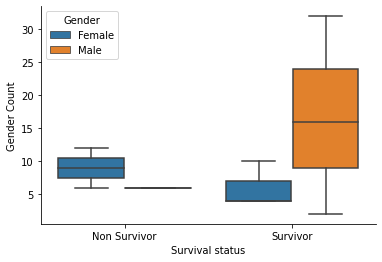

In [33]:
axes2=sns.boxplot(data=df3,x='survival',y='Gender Count', hue='Gender')
axes2.set(xlabel='Survival status', ylabel='Gender Count')
sns.despine()